In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/schemaAgnosticSyntacticWeightsResults.csv', sep='|')
df

,Dataset,Representation Model,Similarity Metric,Duplicates Type,Domain,Valid Pairs,Average Characters D1,Average Tokens D1,Average Characters D2,Average Tokens D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,CHARACTER_BIGRAMS,COSINE_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.988764,0.871287,0.90,81,0.771930,0.988764,0.866995,0.90,21,Right
1,Restaurants,CHARACTER_BIGRAMS,ENHANCED_JACCARD_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.932584,0.817734,0.70,119,0.370833,1.000000,0.541033,0.65,40,Right
2,Restaurants,CHARACTER_BIGRAMS,GENERALIZED_JACCARD_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.966292,0.847291,0.80,47,0.786667,0.662921,0.719512,0.90,9,Right
3,Restaurants,CHARACTER_BIGRAMS_TF_IDF,ARCS_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.898876,0.780488,0.45,41,0.689655,0.898876,0.780488,0.45,9,Right
4,Restaurants,CHARACTER_BIGRAMS_TF_IDF,COSINE_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.988764,0.567742,0.60,32,0.377880,0.921348,0.535948,0.70,8,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Movies,TOKEN_BIGRAM_GRAPHS,GRAPH_VALUE_SIMILARITY,Balanced,Movies,20926,95,15,547,127,...,0.221187,0.357373,0.05,62,0.886909,0.226392,0.360709,0.05,52,Right
437,Movies,TOKEN_TRIGRAMS,COSINE_SIMILARITY,Balanced,Movies,1308919,95,15,547,127,...,0.221537,0.347668,0.05,826,0.620193,0.235621,0.341501,0.05,884,Right
438,Movies,TOKEN_TRIGRAMS_TF_IDF,ARCS_SIMILARITY,Balanced,Movies,1308919,95,15,547,127,...,0.240432,0.383949,0.05,181,0.952151,0.241088,0.384755,0.05,64,Right
439,Movies,TOKEN_TRIGRAMS_TF_IDF,COSINE_SIMILARITY,Balanced,Movies,775767,95,15,547,127,...,0.241132,0.372349,0.05,214,0.665060,0.253423,0.366999,0.05,108,Right


In [2]:
runtimes = pd.DataFrame()
runtimes['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column]

runtimes.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes

,Dataset,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
0,Restaurants,11,46,23,1941,16,15,81,21
1,Restaurants,19,50,14,2020,19,22,119,40
2,Restaurants,8,34,9,1881,12,8,47,9
3,Restaurants,6,8,9,1903,13,7,41,9
4,Restaurants,7,8,10,1883,12,7,32,8
...,...,...,...,...,...,...,...,...,...
436,Movies,41,588,20366,126861,32,60,62,52
437,Movies,76,2117,20736,126891,124,205,826,884
438,Movies,70,179,21165,125728,48,72,181,64
439,Movies,37,1104,21432,126821,63,92,214,108


In [4]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

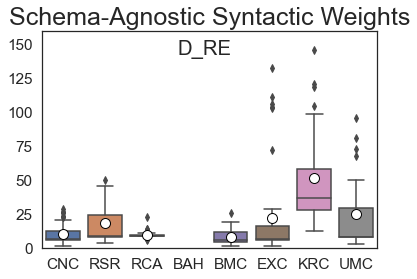

In [6]:
dataset_df = runtimes[runtimes['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
plt.suptitle('D_RE',  y=0.85)
plt.ylim(0, 160)
# plt.savefig('sasyD1RT.eps', format='eps')

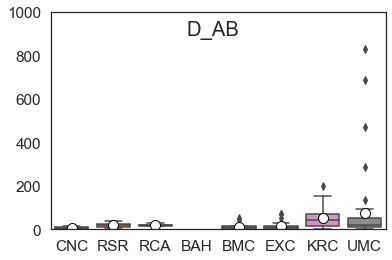

In [7]:
dataset_df = runtimes[runtimes['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AB',  y=0.85)
plt.ylim(0, 1000)
# plt.savefig('sasyD2RT.eps', format='eps')

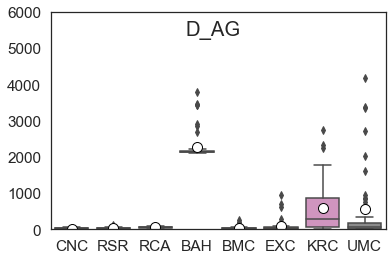

In [8]:
dataset_df = runtimes[runtimes['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AG',  y=0.85)
plt.ylim(0, 6000)
# plt.savefig('sasyD3RT.eps', format='eps')

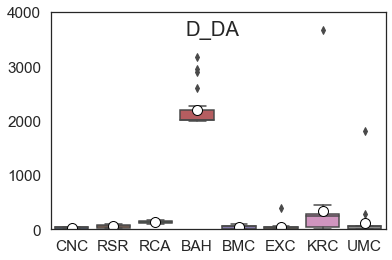

In [9]:
dataset_df = runtimes[runtimes['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DA',  y=0.85)
plt.ylim(0, 4000)
# plt.savefig('sasyD4RT.eps', format='eps')

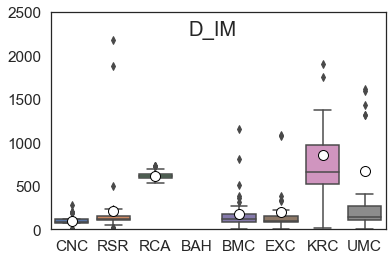

In [10]:
dataset_df = runtimes[runtimes['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_IM',  y=0.85)
plt.ylim(0, 2500)
# plt.savefig('sasyD5RT.eps', format='eps')

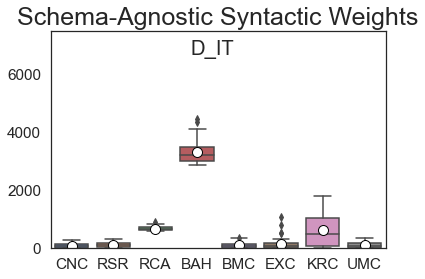

In [11]:
dataset_df = runtimes[runtimes['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
plt.suptitle('D_IT',  y=0.85)
plt.ylim(0, 7500)
# plt.savefig('sasyD6RT.eps', format='eps')

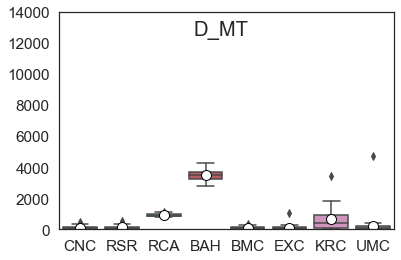

In [12]:
dataset_df = runtimes[runtimes['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_MT',  y=0.85)
plt.ylim(0, 14000)
# plt.savefig('sasyD7RT.eps', format='eps')

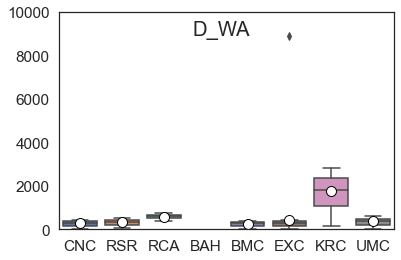

In [13]:
dataset_df = runtimes[runtimes['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_WA',  y=0.85)
plt.ylim(0, 10000)
# plt.savefig('sasyD8RT.eps', format='eps')

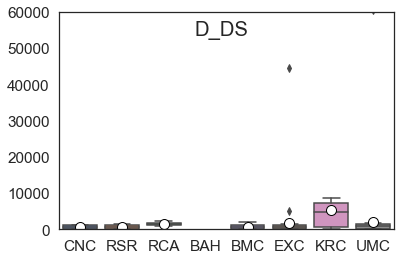

In [14]:
dataset_df = runtimes[runtimes['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DS',  y=0.85)
plt.ylim(0, 60000)
# plt.savefig('sasyD9RT.eps', format='eps')

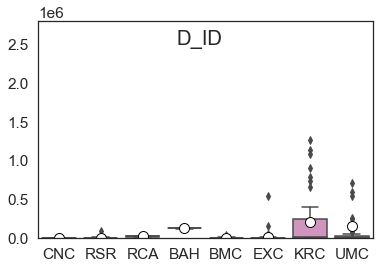

In [15]:
dataset_df = runtimes[runtimes['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_ID',  y=0.85)
plt.ylim(0, 2800000)
# plt.savefig('sasyD10RT.eps', format='eps')